# Feature demo

**feature_demo.py** - This script creates a set of PDFs that illustrate the
effect on the SED of successively turning on various options or changing the
value of some variables.

In [1]:
"""feature_demo.py - This script creates a set of PDFs that illustrate the
effect on the SED of successively turning on various options or changing the
value of some variables.
"""

import os
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import fsps

In [2]:
N = 10
dust = np.linspace(0,2,N)
color = cm.rainbow(np.linspace(0, 1, N))

$$
F_\nu/\lambda = \frac{\lambda}{c} F_\lambda
$$

with $c = 3.10^{18} \AA /s$

In [3]:
def makefig(sps, tage=13.7, oldspec=None, **plotkwargs):
    w, spec = sps.get_spectrum(tage=tage)
    fig, ax = pl.subplots()
    if oldspec is not None:
        ax.plot(w, oldspec / w * 1e19, color='gray', linewidth=2, alpha=0.5)
    ax.plot(w, spec / w * 1e19, 'C2', linewidth=2)
    ax.set_xlim(0,20000)
    return fig, ax, spec

In [4]:
def prettify(fig, ax, label=None):
    ax.set_xlim(0.9e3, 1e6)
    ax.set_xscale('log')
    ax.set_ylim(0.01, 2)
    #ax.set_yscale('log')
    ax.set_xlabel(r'rest-frame $\lambda$ ($\AA$)', fontsize=20)
    ax.set_ylabel(r'$\lambda \, f_\lambda$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=16)
    if label is not None:
        ax.text(0.63, 0.85, label, transform=ax.transAxes, fontsize=16)

    fig.tight_layout()
    return fig, ax

In [5]:
pl.rc('text', usetex=True)
pl.rc('font', family='serif')
pl.rc('axes', grid=False)
pl.rc('xtick', direction='in')
pl.rc('ytick', direction='in')
pl.rc('xtick', top=True)
pl.rc('ytick', right=True)

In [6]:
sps = fsps.StellarPopulation(zcontinuous=1)
ilib, slib, dlib = sps.libraries

In [7]:
#sps?

# Basic spectrum

In [8]:
sps.params['sfh'] = 4
sps.params['tau'] = 5.0
sps.params['logzsol'] = 0.0
sps.params['dust_type'] = 4  # kriek and Conroy (4)
sps.params['imf_type'] = 2  # kroupa
sps.params['imf3'] = 2.3
sps.params["dust2"] = 0.0

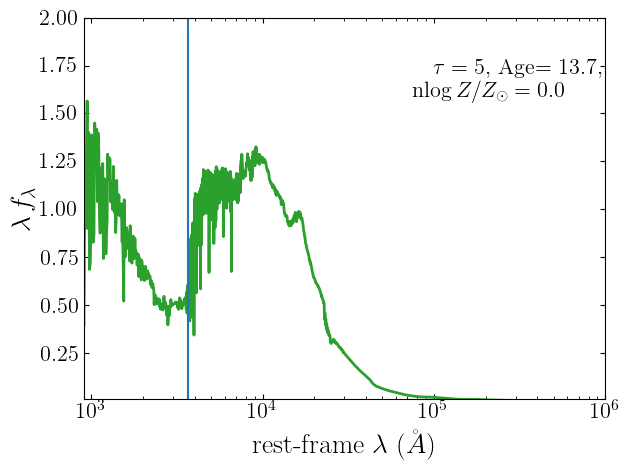

In [9]:
fig, ax, spec = makefig(sps)
fig, ax = prettify(fig, ax, label=r"$\tau=5$, Age$=13.7$,\\n$\log Z/Z_\odot=0.0$")
ax.axvline(3646)

# change IMF

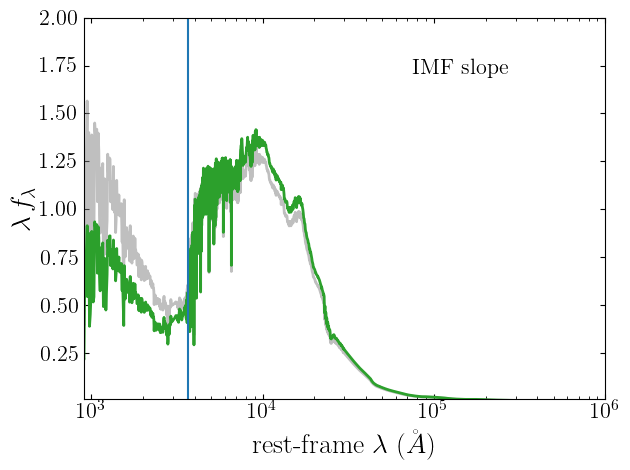

In [10]:
# change IMF
sps.params['imf3'] = 2.5
fig, ax, spec = makefig(sps, oldspec=spec)
ax.axvline(3646)
fig, ax = prettify(fig, ax, label=r"IMF slope")
#pdf.savefig(fig)


# Attenuate

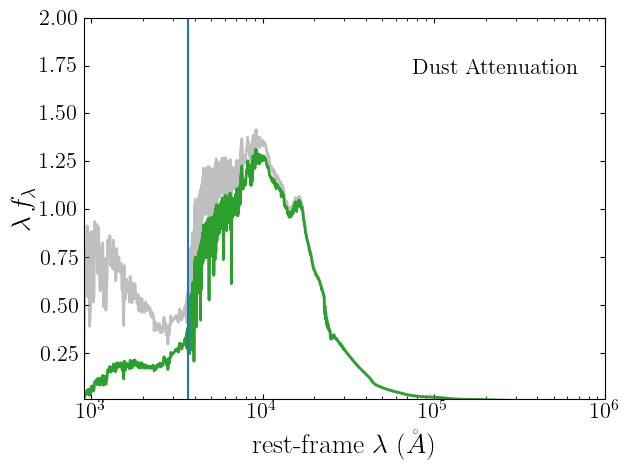

In [11]:
 # Attenuate
sps.params['add_dust_emission'] = False
sps.params['dust2'] = 0.2
fig, ax, spec = makefig(sps, oldspec=spec)
fig, ax = prettify(fig, ax, label=r"Dust Attenuation")
ax.axvline(3646)
#pdf.savefig(fig)
#pl.close(fig)


# Dust emission

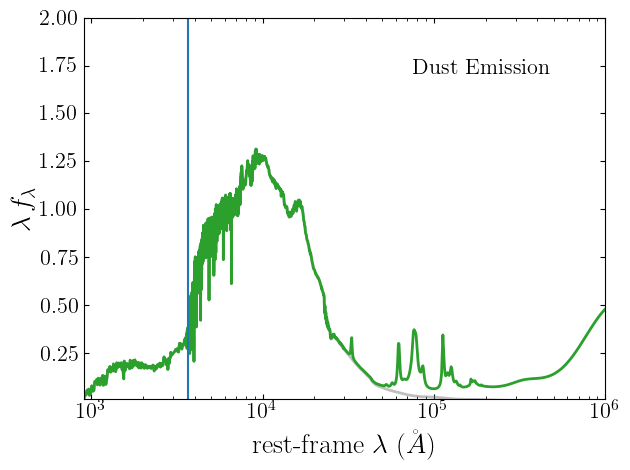

In [12]:
# Dust emission
sps.params['add_dust_emission'] = True
fig, ax, spec = makefig(sps, oldspec=spec)
fig, ax = prettify(fig, ax, label=r"Dust Emission")
ax.axvline(3646)
#pdf.savefig(fig)
#pl.close(fig)

# Dust temperature

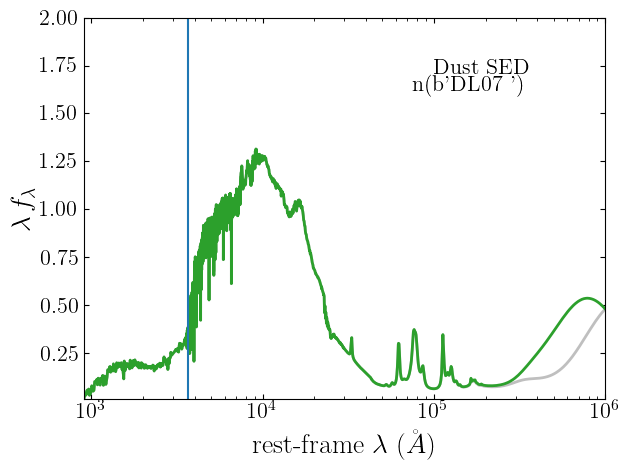

In [13]:
sps.params['duste_umin'] = 10
fig, ax, spec = makefig(sps, oldspec=spec)
fig, ax = prettify(fig, ax, label=r"Dust SED\\n({})".format(dlib))
ax.axvline(3646)
#pdf.savefig(fig)
#pl.close(fig)

# AGN emission

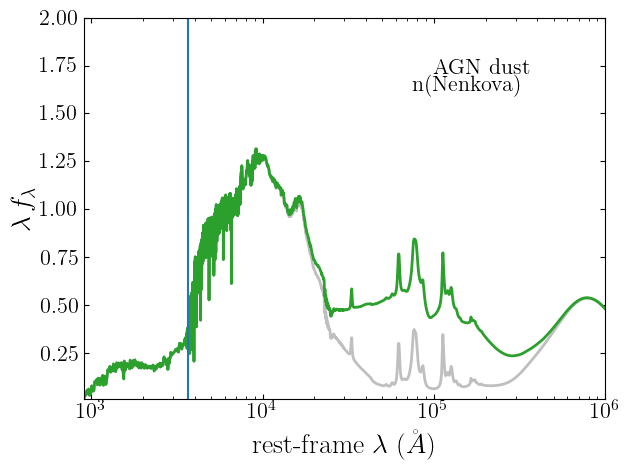

In [14]:
# AGN emission 
sps.params['fagn'] = 0.3
fig, ax, spec = makefig(sps, oldspec=spec)
fig, ax = prettify(fig, ax, label=r"AGN dust\\n(Nenkova)")
ax.axvline(3646)
#pdf.savefig(fig)
#pl.close(fig)

# Nebular emission

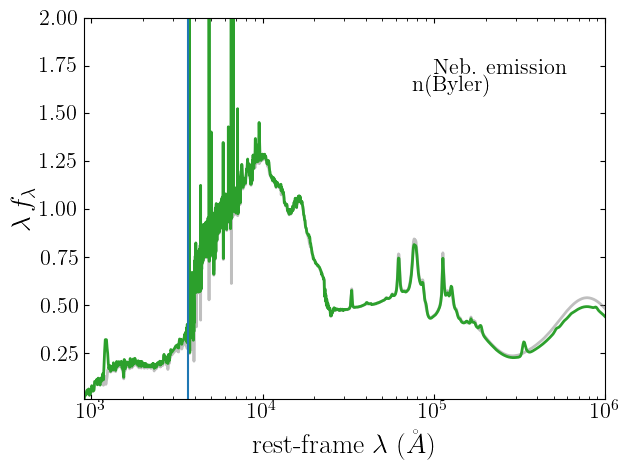

In [15]:
# Nebular emission
sps.params['add_neb_emission'] = True
sps.params['gas_logu'] = -3.5
fig, ax, spec = makefig(sps, oldspec=spec)
fig, ax = prettify(fig, ax, label=r"Neb. emission\\n(Byler)")
ax.axvline(3646)
#pdf.savefig(fig)
#pl.close(fig)

# change logu

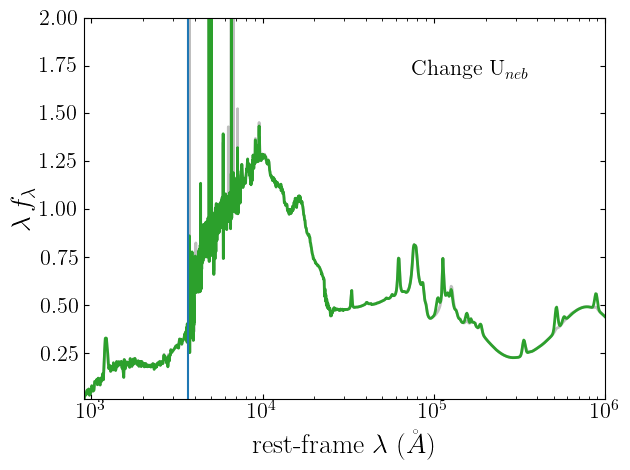

In [16]:
# change logu
sps.params['gas_logu'] = -1.0
fig, ax, spec = makefig(sps, oldspec=spec)
fig, ax = prettify(fig, ax, label=r"Change U$_{neb}$")
ax.axvline(3646)
#pdf.savefig(fig)
#pl.close(fig)

# change logz

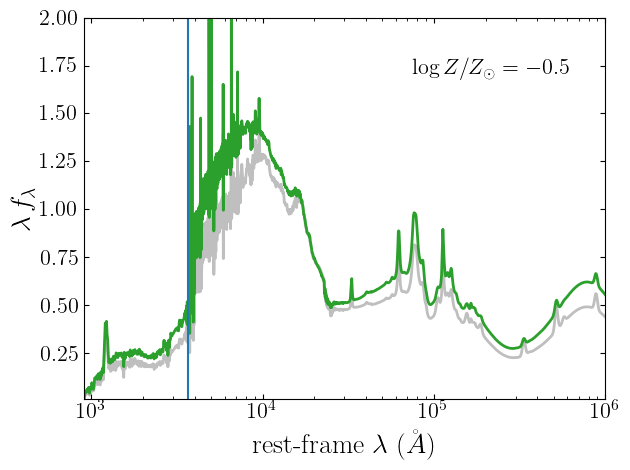

In [17]:
# change logz
sps.params['logzsol'] = -0.5
sps.params['gas_logz'] = -0.5
fig, ax, spec = makefig(sps, oldspec=spec)
fig, ax = prettify(fig, ax, label=r"$\log Z/Z_\odot=-0.5$")
ax.axvline(3646)
#pdf.savefig(fig)
#pl.close(fig)

# IGM absorption

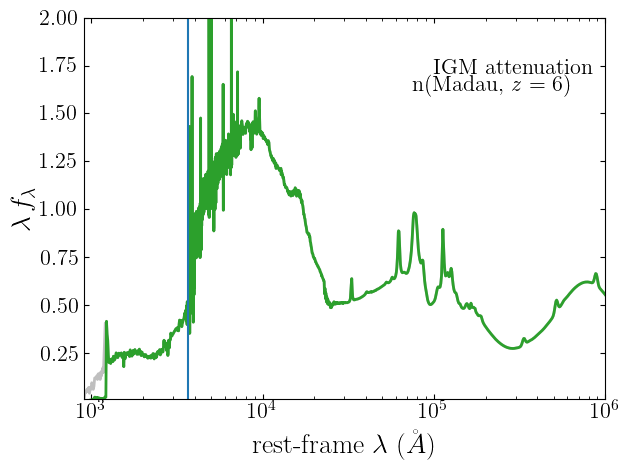

In [18]:
# IGM absorption
sps.params['zred'] = 6.0
sps.params['add_igm_absorption'] = True
fig, ax, spec = makefig(sps, oldspec=spec)
fig, ax = prettify(fig, ax, label=r"IGM attenuation\\n(Madau, $z=6$)")
ax.axvline(3646)
#pdf.savefig(fig)
#pl.close(fig)